University of Helsinki, Master's Programme in Data Science  
DATA20019 Trustworthy Machine Learning, Autumn 2019  
Antti Honkela and Razane Tajeddine  

# Project 2: Real-life privacy-preserving machine learning

Deadline for returning the solutions: 24 November 23:55.

## General instructions (IMPORTANT!)

1. This is an individual project. You can discuss the solutions with other students, but everyone needs to write their own code and answers.
2. Please return your solutions as a notebook. When returning your solutions, please leave all output in the notebook.
3. When returning your solutions, please make sure the notebook can be run cleanly using "Cell" / "Run All".
4. Please make sure there are no dependencies between solutions to different problems.
5. Please make sure that your notebook will not depend on any local files.
6. Please make sure that the solutions for each problem in your notebook will produce the same results when run multiple times, i.e. remember to seed any random number generators you use (`numpy.random.seed()`!).


## Task 1: Differentially private logistic regression with DP-SGD and synthetic data

TensorFlow Privacy (https://github.com/tensorflow/privacy) library provides implementations of many differentially private optimisation algorithms for deep learning and other models. In order to perform these exercises, you will need to install TensorFlow Privacy and its dependencies according to instructions given on the website.

In order to study TensorFlow Privacy, we will use logistic regression on a small synthetic data set. This will be faster to run than larger neural network models. A simple example implementation of the model is available at https://github.com/ahonkela/privacy/blob/master/tutorials/toy_lr_tutorial.py
The code has been adapted from tutorials provided with TensorFlow privacy.

The definition of the logistic regression model binary classification is itself very straightforward in TensorFlow, simply using a single fully connected linear layer with cross entropy loss:
```{python}
  # Define logistic regression model using tf.keras.layers.
  logits = tf.keras.layers.Dense(2).apply(features['x'])

  # Calculate loss as a vector (to support microbatches in DP-SGD).
  vector_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
      labels=labels, logits=logits)
```

The rest of the example provides supporting architecture. Key parameters of the algorithm are defined as `flags` at the beginning of the file. These include:
```{python}
flags.DEFINE_float('learning_rate', .05, 'Learning rate for training')
flags.DEFINE_float('noise_multiplier', 2.0,
                   'Ratio of the standard deviation to the clipping norm')
flags.DEFINE_float('l2_norm_clip', 1.0, 'Clipping norm')
flags.DEFINE_integer('batch_size', 64, 'Batch size')
flags.DEFINE_integer('epochs', 2, 'Number of epochs')
```

`learning_rate` is the initial learning rate for the Adam optimiser. Larger value means faster learning but can cause instability.  
`noise_multiplier` controls the amount of noise added in DP-SGD: higher value means more noise. The value is defined relative to the gradient clipping norm.  
`l2_norm_clip` is the maximum norm at which per-example gradients are clipped. Smaller values mean less noise with the same level of privacy, but too small values can bias the results and make learning impossible.  
`batch_size` is the minibatch size which impacts privacy via amplification from subsampling. Smaller batch sizes increase privacy for equal number of epochs, but too small batches can make the learning unstable.  
`epochs` controls the length of training as a number of passes over the entire data.

Test how these parameters (clipping threshold, batch size, noise multiplier and learning rate) affect the accuracy of the classifier and the privacy. Plot all your results to a privacy ($\epsilon$) vs. accuracy plot to trace the optimal accuracy achievable under a specific level of privacy.

You can limit the number of experiments to keep the runtimes reasonable: it is not necessary to try every combination of parameters but you can focus on testing the effect of one variable at a time. TensorFlow can use GPUs which can speed up learning significantly.

Note: testing several hyperparameters and choosing the best has an impact on the privacy guarantees. There are methods for dealing with this (e.g. https://arxiv.org/abs/1811.07971) but the field is still under active development.

**Considerations**

To do this task I followed the instructions provided. To keep the runtimes reasonable I tested the effect of one hyperparameter at a time keeping the others to their default values (values provided in the code). I tried these values for the hyperparameters:
1. Learning rate: 0.01, 0.05, 0.1, 0.5;
2. Norm clipping: 0.5, 1.0, 1.5, 2.0;
3. Batch size: 32, 64, 128, 256;
4. Noise multiplier: 1.5, 2.0, 2.5, 3.0.

These are the considerations about the plots I have provided in the code cell related to this task:

**Learning rate**

The best accuracy (0.835) has been obtained by the model trained with 0.5 learning rate after the first epoch of training. This accuracy corresponds to the best $\epsilon$ achieved by the model too (0.47). The other models arrive at the same accuracy after many epochs causing the $\epsilon$ to grow during the training, so we can say that the model trained with 0.5 learning rate has the best test accuracy/$\epsilon$ ratio.

**Norm clipping**

The best accuracy (0.835) has been obtained by the model trained with 1.0 norm clipping after five epochs of training. This accuracy is related to a small value of $\epsilon$ too (0.59). The other models arrive at the same accuracy after many epochs causing the $\epsilon$ to grow during the training, so we can say that the model trained with 1.0 norm clipping has the best test accuracy/$\epsilon$ ratio. Finally, the model with 2.0 norm clipping has a similar behaviour but I decided to keep the 1.0 norm clipping model as the best because it starts the training with an higher test accuracy.

**Batch size**

The best accuracy (0.840) has been obtained by the model trained with 32 batch size after ten epochs of training. This accuracy is related to a small value of $\epsilon$ too (0.48). The other models arrive at the same accuracy with a similar number of epochs but with an higher value of $\epsilon$, so we can say that the model trained with 32 batch size has the best test accuracy/$\epsilon$ ratio. This is due to the fact that the other models start the training with an higher value of $\epsilon$ compared to the best model.

**Noise multiplier**

The best accuracy (0.840) has been obtained by the model trained with 3.0 noise multiplier after eleven epochs of training. This accuracy is related to a small value of $\epsilon$ too (0.40). The other models arrive at the same accuracy with a similar number of epochs but with an higher value of $\epsilon$, so we can say that the model trained with 3.0 noise multiplier has the best test accuracy/$\epsilon$ ratio. This is due to the fact that the other models start the training with an higher value of $\epsilon$ compared to the best model.

**Other experiment**

After the experiment for the first task has been performed I tried to train a model with the best values of the hyperparameters found on the first task. These are the best values found for the hyperparameters:
1. Learning rate: 0.5;
2. Norm clipping: 1.0;
3. Batch size: 32;
4. Noise multiplier: 3.0.

In the second code cell related to this task it is possible to observe the plot of this final experiment. It is possible to observe that the hyperparameters values found in the first task work well when they are put together, in fact after six epochs of training the model obtains its best accuracy (0.835) with a really small value of $\epsilon$ (0.24). Finally, it is interesting to observe that this final model has obtained the smallest value of $\epsilon$ seen in these experiments.



TensorFlow 2.x selected.
Learning rate: 0.01
Norm clipping: 1.0
Batch size: 64
Noise multiplier 2.0
For delta=1e-5, the current epsilon is: 0.47
Test accuracy after 0.1 epochs is: 0.563
For delta=1e-5, the current epsilon is: 0.49
Test accuracy after 0.2 epochs is: 0.584
For delta=1e-5, the current epsilon is: 0.52
Test accuracy after 0.3 epochs is: 0.605
For delta=1e-5, the current epsilon is: 0.54
Test accuracy after 0.4 epochs is: 0.618
For delta=1e-5, the current epsilon is: 0.56
Test accuracy after 0.5 epochs is: 0.640
For delta=1e-5, the current epsilon is: 0.59
Test accuracy after 0.6 epochs is: 0.659
For delta=1e-5, the current epsilon is: 0.61
Test accuracy after 0.7 epochs is: 0.682
For delta=1e-5, the current epsilon is: 0.63
Test accuracy after 0.8 epochs is: 0.697
For delta=1e-5, the current epsilon is: 0.65
Test accuracy after 0.9 epochs is: 0.706
For delta=1e-5, the current epsilon is: 0.67
Test accuracy after 1.0 epochs is: 0.723
For delta=1e-5, the current epsilon is: 

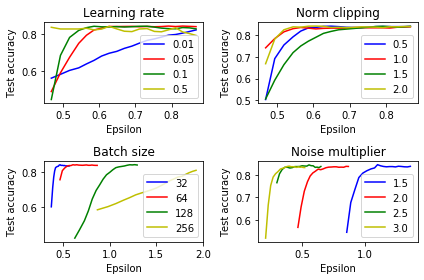

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
%tensorflow_version 2.x
import math
import matplotlib.pyplot as plt
# Copyright 2018, The TensorFlow Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Modified to use logistic regression instead of CNN
# and synthetic data instead of MNIST by Antti Honkela, 2019

"""Training a logistic regression model with differentially private SGD optimizer."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import app
from absl import flags

import numpy as np
import numpy.random as npr
import tensorflow as tf

from tensorflow_privacy.privacy.analysis import privacy_ledger
from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp_from_ledger
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent
from tensorflow_privacy.privacy.optimizers import dp_optimizer

AdamOptimizer = tf.compat.v1.train.AdamOptimizer
flags.DEFINE_float('l2_norm_clip', 1.0, 'Clipping norm')
flags.DEFINE_float('learning_rate', .05, 'Learning rate for training')
flags.DEFINE_integer('batch_size', 64, 'Batch size')
flags.DEFINE_float('noise_multiplier', 2.0,
                   'Ratio of the standard deviation to the clipping norm')

def set_hyperparameters(norm_clip, lr, batch_size, noise_mult):
  # clean flags
  delattr(flags.FLAGS, 'l2_norm_clip')
  delattr(flags.FLAGS, 'learning_rate')
  delattr(flags.FLAGS, 'batch_size')
  delattr(flags.FLAGS, 'noise_multiplier')
  # redifine flags
  print("Learning rate:", lr)
  print("Norm clipping:", norm_clip)
  print("Batch size:", batch_size)
  print("Noise multiplier", noise_mult)
  flags.DEFINE_float('l2_norm_clip', norm_clip, 'Clipping norm')
  flags.DEFINE_float('learning_rate', lr, 'Learning rate for training')
  flags.DEFINE_integer('batch_size', batch_size, 'Batch size')
  flags.DEFINE_float('noise_multiplier', noise_mult,
                   'Ratio of the standard deviation to the clipping norm')

FLAGS = flags.FLAGS

flags.DEFINE_boolean(
    'dpsgd', True, 'If True, train with DP-SGD. If False, '
    'train with vanilla SGD.')
flags.DEFINE_integer('epochs', 2, 'Number of epochs')
flags.DEFINE_integer('training_data_size', 2000, 'Training data size')
flags.DEFINE_integer('test_data_size', 2000, 'Test data size')
flags.DEFINE_integer('input_dimension', 5, 'Input dimension')
flags.DEFINE_string('model_dir', None, 'Model directory')
flags.DEFINE_string('f', '', '')

def task(norm_clip=1.0, lr=.05, batch_size=64, noise_mult=2.0):
  test_acc = []
  set_hyperparameters(norm_clip, lr, batch_size, noise_mult)
  # Instantiate the tf.Estimator.
  lr_classifier = tf.estimator.Estimator(model_fn=lr_model_fn,
                                        model_dir=FLAGS.model_dir)

  # Create tf.Estimator input functions for the training and test data.
  train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
      x={'x': train_data},
      y=train_labels,
      batch_size=FLAGS.batch_size,
      num_epochs=FLAGS.epochs,
      shuffle=True)
  eval_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
      x={'x': test_data},
      y=test_labels,
      num_epochs=1,
      shuffle=False)

  # Training loop.
  steps_per_epoch = FLAGS.training_data_size // FLAGS.batch_size / 10
  for epoch in range(1, 10*FLAGS.epochs + 1):
    # Train the model for one epoch.
    lr_classifier.train(input_fn=train_input_fn, steps=steps_per_epoch)

    # Evaluate the model and print results
    eval_results = lr_classifier.evaluate(input_fn=eval_input_fn)
    test_accuracy = eval_results['accuracy']
    test_acc.append(test_accuracy)
    print('Test accuracy after %.1f epochs is: %.3f' % (epoch/10, test_accuracy))
  return test_acc
  

class EpsilonPrintingTrainingHook(tf.estimator.SessionRunHook):
  """Training hook to print current value of epsilon after an epoch."""

  def __init__(self, ledger):
    """Initalizes the EpsilonPrintingTrainingHook.
    Args:
      ledger: The privacy ledger.
    """
    self._samples, self._queries = ledger.get_unformatted_ledger()

  def end(self, session):
    global eps_arr
    orders = [1 + x / 10.0 for x in range(1, 100)] + list(range(12, 64))
    samples = session.run(self._samples)
    queries = session.run(self._queries)
    formatted_ledger = privacy_ledger.format_ledger(samples, queries)
    rdp = compute_rdp_from_ledger(formatted_ledger, orders)
    eps = get_privacy_spent(orders, rdp, target_delta=1e-5)[0]
    eps_arr.append(eps)
    print('For delta=1e-5, the current epsilon is: %.2f' % eps)


def lr_model_fn(features, labels, mode):
  """Model function for a LR."""

  # Define logistic regression model using tf.keras.layers.
  logits = tf.keras.layers.Dense(2).apply(features['x'])

  # Calculate loss as a vector (to support microbatches in DP-SGD).
  vector_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
      labels=labels, logits=logits)
  # Define mean of loss across minibatch (for reporting through tf.Estimator).
  scalar_loss = tf.reduce_mean(input_tensor=vector_loss)

  # Configure the training op (for TRAIN mode).
  if mode == tf.estimator.ModeKeys.TRAIN:

    if FLAGS.dpsgd:
      ledger = privacy_ledger.PrivacyLedger(
          population_size=FLAGS.training_data_size,
          selection_probability=(FLAGS.batch_size / FLAGS.training_data_size))

      # Use DP version of AdamOptimizer. Other optimizers are
      # available in dp_optimizer. Most optimizers inheriting from
      # tf.train.Optimizer should be wrappable in differentially private
      # counterparts by calling dp_optimizer.optimizer_from_args().
      # Setting num_microbatches to None is necessary for DP and
      # per-example gradients
      optimizer = dp_optimizer.DPAdamGaussianOptimizer(
          l2_norm_clip=FLAGS.l2_norm_clip,
          noise_multiplier=FLAGS.noise_multiplier,
          num_microbatches=None,
          ledger=ledger,
          learning_rate=FLAGS.learning_rate)
      training_hooks = [
          EpsilonPrintingTrainingHook(ledger)
      ]
      opt_loss = vector_loss
    else:
      optimizer = AdamOptimizer(learning_rate=FLAGS.learning_rate)
      training_hooks = []
      opt_loss = scalar_loss
    global_step = tf.compat.v1.train.get_global_step()
    train_op = optimizer.minimize(loss=opt_loss, global_step=global_step)
    # In the following, we pass the mean of the loss (scalar_loss) rather than
    # the vector_loss because tf.estimator requires a scalar loss. This is only
    # used for evaluation and debugging by tf.estimator. The actual loss being
    # minimized is opt_loss defined above and passed to optimizer.minimize().
    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=scalar_loss,
                                      train_op=train_op,
                                      training_hooks=training_hooks)

  # Add evaluation metrics (for EVAL mode).
  elif mode == tf.estimator.ModeKeys.EVAL:
    eval_metric_ops = {
        'accuracy':
            tf.compat.v1.metrics.accuracy(
                labels=labels,
                predictions=tf.argmax(input=logits, axis=1))
    }

    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=scalar_loss,
                                      eval_metric_ops=eval_metric_ops)

def generate_data():
  npr.seed(4242)
  N_train = FLAGS.training_data_size
  N_test = FLAGS.test_data_size
  N = N_train + N_test
  X0 = npr.randn(N, FLAGS.input_dimension)
  temp = X0 @ npr.randn(FLAGS.input_dimension, 1) + npr.randn(N, 1)
  Y0 = np.round(1/(1+np.exp(-temp)))

  train_X = X0[0:N_train, :]
  test_X = X0[N_train:N, :]
  train_Y = Y0[0:N_train, 0]
  test_Y = Y0[N_train:N, 0]
  train_X = np.array(train_X, dtype=np.float32)
  test_X = np.array(test_X, dtype=np.float32)
  train_Y = np.array(train_Y, dtype=np.int32)
  test_Y = np.array(test_Y, dtype=np.int32)
  return train_X, train_Y, test_X, test_Y
  

def main(unused_argv):
  global eps_arr
  eps_arr = []
  tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

  # Load training and test data.
  global train_data
  global train_labels
  global test_data
  global test_labels
  train_data, train_labels, test_data, test_labels = generate_data()

  # find best learning rate keeping other parametes untouched
  fig = plt.figure()
  plt.subplot(2, 2, 1)
  plt.title("Learning rate")
  plt.xlabel("Epsilon")
  plt.ylabel("Test accuracy")
  test_acc = task(lr=.01)
  plt.plot(eps_arr, test_acc, color='b', label="0.01")
  eps_arr = []
  test_acc = task(lr=.05)
  plt.plot(eps_arr, test_acc, color='r', label="0.05")
  eps_arr = []
  test_acc = task(lr=.1)
  plt.plot(eps_arr, test_acc, color='g', label="0.1")
  eps_arr = []
  test_acc = task(lr=.5)
  plt.plot(eps_arr, test_acc, color='y', label="0.5")
  plt.legend()
  
    
  # find best norm clipping keeping other parameters untouched
  c = ['b', 'r', 'g', 'y']
  plt.subplot(2,2,2)
  plt.title("Norm clipping")
  plt.xlabel("Epsilon")
  plt.ylabel("Test accuracy")
  i = 0
  for norm_clipping in np.arange(0.5, 2.1, 0.5):
    eps_arr = []
    test_acc = task(norm_clip=norm_clipping)
    plt.plot(eps_arr, test_acc, color=c[i], label=str(norm_clipping))
    i += 1
  plt.legend()

  # find best batch size keeping other parameters untouched
  i = 0
  plt.subplot(2,2,3)
  plt.title("Batch size")
  plt.xlabel("Epsilon")
  plt.ylabel("Test accuracy")
  for batch_s in range(0, 4):
    eps_arr = []
    test_acc = task(batch_size=int(32*math.pow(2,batch_s)))
    plt.plot(eps_arr, test_acc, color=c[i], label=str(int(32*math.pow(2,batch_s))))
    i += 1
  plt.legend()

  # find best noise multiplier keeping the other parameters untouched
  i = 0
  plt.subplot(2,2,4)
  plt.title("Noise multiplier")
  plt.xlabel("Epsilon")
  plt.ylabel("Test accuracy")
  for noise_m in np.arange(1.5, 3.1, 0.5):
    eps_arr = []
    test_acc = task(noise_mult=noise_m)
    plt.plot(eps_arr, test_acc, color=c[i], label=str(noise_m))
    i += 1
  plt.legend()
  plt.tight_layout()
  plt.show()

if __name__ == '__main__':
  app.run(main)

TensorFlow 2.x selected.
Learning rate: 0.5
Norm clipping: 1.0
Batch size: 32
Noise multiplier 3.0
For delta=1e-5, the current epsilon is: 0.19
Test accuracy after 0.1 epochs is: 0.682
For delta=1e-5, the current epsilon is: 0.20
Test accuracy after 0.2 epochs is: 0.779
For delta=1e-5, the current epsilon is: 0.21
Test accuracy after 0.3 epochs is: 0.796
For delta=1e-5, the current epsilon is: 0.22
Test accuracy after 0.4 epochs is: 0.795
For delta=1e-5, the current epsilon is: 0.22
Test accuracy after 0.5 epochs is: 0.815
For delta=1e-5, the current epsilon is: 0.23
Test accuracy after 0.6 epochs is: 0.835
For delta=1e-5, the current epsilon is: 0.24
Test accuracy after 0.7 epochs is: 0.828
For delta=1e-5, the current epsilon is: 0.25
Test accuracy after 0.8 epochs is: 0.789
For delta=1e-5, the current epsilon is: 0.25
Test accuracy after 0.9 epochs is: 0.783
For delta=1e-5, the current epsilon is: 0.26
Test accuracy after 1.0 epochs is: 0.782
For delta=1e-5, the current epsilon is: 0

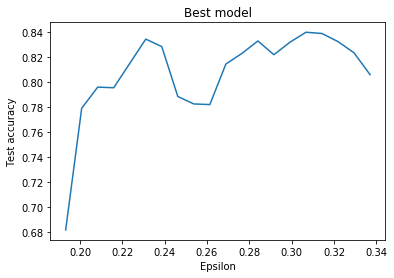

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
# training a model with the best values found for the hyperparameters
%tensorflow_version 2.x
import math
import matplotlib.pyplot as plt
# Copyright 2018, The TensorFlow Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Modified to use logistic regression instead of CNN
# and synthetic data instead of MNIST by Antti Honkela, 2019

"""Training a logistic regression model with differentially private SGD optimizer."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import app
from absl import flags

import numpy as np
import numpy.random as npr
import tensorflow as tf

from tensorflow_privacy.privacy.analysis import privacy_ledger
from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp_from_ledger
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent
from tensorflow_privacy.privacy.optimizers import dp_optimizer

AdamOptimizer = tf.compat.v1.train.AdamOptimizer
flags.DEFINE_float('l2_norm_clip', 1.0, 'Clipping norm')
flags.DEFINE_float('learning_rate', .05, 'Learning rate for training')
flags.DEFINE_integer('batch_size', 64, 'Batch size')
flags.DEFINE_float('noise_multiplier', 2.0,
                   'Ratio of the standard deviation to the clipping norm')

def set_hyperparameters(norm_clip, lr, batch_size, noise_mult):
  # clean flags
  delattr(flags.FLAGS, 'l2_norm_clip')
  delattr(flags.FLAGS, 'learning_rate')
  delattr(flags.FLAGS, 'batch_size')
  delattr(flags.FLAGS, 'noise_multiplier')
  # redifine flags
  print("Learning rate:", lr)
  print("Norm clipping:", norm_clip)
  print("Batch size:", batch_size)
  print("Noise multiplier", noise_mult)
  flags.DEFINE_float('l2_norm_clip', norm_clip, 'Clipping norm')
  flags.DEFINE_float('learning_rate', lr, 'Learning rate for training')
  flags.DEFINE_integer('batch_size', batch_size, 'Batch size')
  flags.DEFINE_float('noise_multiplier', noise_mult,
                   'Ratio of the standard deviation to the clipping norm')

FLAGS = flags.FLAGS

flags.DEFINE_boolean(
    'dpsgd', True, 'If True, train with DP-SGD. If False, '
    'train with vanilla SGD.')
flags.DEFINE_integer('epochs', 2, 'Number of epochs')
flags.DEFINE_integer('training_data_size', 2000, 'Training data size')
flags.DEFINE_integer('test_data_size', 2000, 'Test data size')
flags.DEFINE_integer('input_dimension', 5, 'Input dimension')
flags.DEFINE_string('model_dir', None, 'Model directory')
flags.DEFINE_string('f', '', '')

def task(norm_clip=1.0, lr=.05, batch_size=64, noise_mult=2.0):
  test_acc = []
  set_hyperparameters(norm_clip, lr, batch_size, noise_mult)
  # Instantiate the tf.Estimator.
  lr_classifier = tf.estimator.Estimator(model_fn=lr_model_fn,
                                        model_dir=FLAGS.model_dir)

  # Create tf.Estimator input functions for the training and test data.
  train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
      x={'x': train_data},
      y=train_labels,
      batch_size=FLAGS.batch_size,
      num_epochs=FLAGS.epochs,
      shuffle=True)
  eval_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
      x={'x': test_data},
      y=test_labels,
      num_epochs=1,
      shuffle=False)

  # Training loop.
  steps_per_epoch = FLAGS.training_data_size // FLAGS.batch_size / 10
  for epoch in range(1, 10*FLAGS.epochs + 1):
    # Train the model for one epoch.
    lr_classifier.train(input_fn=train_input_fn, steps=steps_per_epoch)

    # Evaluate the model and print results
    eval_results = lr_classifier.evaluate(input_fn=eval_input_fn)
    test_accuracy = eval_results['accuracy']
    test_acc.append(test_accuracy)
    print('Test accuracy after %.1f epochs is: %.3f' % (epoch/10, test_accuracy))
  return test_acc
  

class EpsilonPrintingTrainingHook(tf.estimator.SessionRunHook):
  """Training hook to print current value of epsilon after an epoch."""

  def __init__(self, ledger):
    """Initalizes the EpsilonPrintingTrainingHook.
    Args:
      ledger: The privacy ledger.
    """
    self._samples, self._queries = ledger.get_unformatted_ledger()

  def end(self, session):
    global eps_arr
    orders = [1 + x / 10.0 for x in range(1, 100)] + list(range(12, 64))
    samples = session.run(self._samples)
    queries = session.run(self._queries)
    formatted_ledger = privacy_ledger.format_ledger(samples, queries)
    rdp = compute_rdp_from_ledger(formatted_ledger, orders)
    eps = get_privacy_spent(orders, rdp, target_delta=1e-5)[0]
    eps_arr.append(eps)
    print('For delta=1e-5, the current epsilon is: %.2f' % eps)


def lr_model_fn(features, labels, mode):
  """Model function for a LR."""

  # Define logistic regression model using tf.keras.layers.
  logits = tf.keras.layers.Dense(2).apply(features['x'])

  # Calculate loss as a vector (to support microbatches in DP-SGD).
  vector_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
      labels=labels, logits=logits)
  # Define mean of loss across minibatch (for reporting through tf.Estimator).
  scalar_loss = tf.reduce_mean(input_tensor=vector_loss)

  # Configure the training op (for TRAIN mode).
  if mode == tf.estimator.ModeKeys.TRAIN:

    if FLAGS.dpsgd:
      ledger = privacy_ledger.PrivacyLedger(
          population_size=FLAGS.training_data_size,
          selection_probability=(FLAGS.batch_size / FLAGS.training_data_size))

      # Use DP version of AdamOptimizer. Other optimizers are
      # available in dp_optimizer. Most optimizers inheriting from
      # tf.train.Optimizer should be wrappable in differentially private
      # counterparts by calling dp_optimizer.optimizer_from_args().
      # Setting num_microbatches to None is necessary for DP and
      # per-example gradients
      optimizer = dp_optimizer.DPAdamGaussianOptimizer(
          l2_norm_clip=FLAGS.l2_norm_clip,
          noise_multiplier=FLAGS.noise_multiplier,
          num_microbatches=None,
          ledger=ledger,
          learning_rate=FLAGS.learning_rate)
      training_hooks = [
          EpsilonPrintingTrainingHook(ledger)
      ]
      opt_loss = vector_loss
    else:
      optimizer = AdamOptimizer(learning_rate=FLAGS.learning_rate)
      training_hooks = []
      opt_loss = scalar_loss
    global_step = tf.compat.v1.train.get_global_step()
    train_op = optimizer.minimize(loss=opt_loss, global_step=global_step)
    # In the following, we pass the mean of the loss (scalar_loss) rather than
    # the vector_loss because tf.estimator requires a scalar loss. This is only
    # used for evaluation and debugging by tf.estimator. The actual loss being
    # minimized is opt_loss defined above and passed to optimizer.minimize().
    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=scalar_loss,
                                      train_op=train_op,
                                      training_hooks=training_hooks)

  # Add evaluation metrics (for EVAL mode).
  elif mode == tf.estimator.ModeKeys.EVAL:
    eval_metric_ops = {
        'accuracy':
            tf.compat.v1.metrics.accuracy(
                labels=labels,
                predictions=tf.argmax(input=logits, axis=1))
    }

    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=scalar_loss,
                                      eval_metric_ops=eval_metric_ops)

def generate_data():
  npr.seed(4242)
  N_train = FLAGS.training_data_size
  N_test = FLAGS.test_data_size
  N = N_train + N_test
  X0 = npr.randn(N, FLAGS.input_dimension)
  temp = X0 @ npr.randn(FLAGS.input_dimension, 1) + npr.randn(N, 1)
  Y0 = np.round(1/(1+np.exp(-temp)))

  train_X = X0[0:N_train, :]
  test_X = X0[N_train:N, :]
  train_Y = Y0[0:N_train, 0]
  test_Y = Y0[N_train:N, 0]
  train_X = np.array(train_X, dtype=np.float32)
  test_X = np.array(test_X, dtype=np.float32)
  train_Y = np.array(train_Y, dtype=np.int32)
  test_Y = np.array(test_Y, dtype=np.int32)
  return train_X, train_Y, test_X, test_Y
  

def main(unused_argv):
  global eps_arr
  eps_arr = []
  tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

  # Load training and test data.
  global train_data
  global train_labels
  global test_data
  global test_labels
  train_data, train_labels, test_data, test_labels = generate_data()

  # model with best hyperparameters discovered
  fig = plt.figure()
  plt.title("Best model")
  plt.xlabel("Epsilon")
  plt.ylabel("Test accuracy")
  test_acc = task(norm_clip=1.0, lr=.5, batch_size=32, noise_mult=3.0)
  plt.plot(eps_arr, test_acc)
  plt.show()

if __name__ == '__main__':
  app.run(main)

## Task 2: DP logistic regression on realistic data

Using the above code as a basis, build a DP logistic regression classifier for the UCI Adult data set (https://archive.ics.uci.edu/ml/datasets/Adult). (The data set is a standard benchmark data set that is available in various packages - feel free to use one of those.)

How accurate classifier can you build to predict if an individual has an income of at most 50k, using DP with $\epsilon=1, \delta = 10^{-5}$? Report your accuracy on the separate test set not used in learning.

Hint: the data set includes many categorical variables. In order to use these, you will need to use a one-hot encoding with $n-1$ variables used to denote $n$ values so that $k$th value is represented by value 1 in $k-1$st variable and zeros otherwise.

**Considerations**

Tensorflow Privacy doesn't allow to set both $\epsilon$ and $\delta$ for the training of the model. It allows only to compute the value of $\epsilon$ in function of $\delta$ or the value of $\delta$ in function of $\epsilon$. So, to do this task I've set $\delta$ to $10e^{-5}$ and then I tuned the hyperparameters of the model to find a combination that was able to reach an $\epsilon$ equal to 1 and then I stopped the training and I returned the requested test accuracy. The test accuracy obtained with $\delta=10e^{-5}$ and $\epsilon=1$ is 0.77224433 and it has been obtained after 16 epochs of training of the model trained with the following values of the hyperparameters:
1. Learning rate: 0.05;
2. Norm clipping: 0.1;
3. Batch size: 64;
4. Noise multiplier: 1.05.

In [0]:
%tensorflow_version 2.x
# Copyright 2018, The TensorFlow Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Modified to use logistic regression instead of CNN
# and synthetic data instead of MNIST by Antti Honkela, 2019

"""Training a logistic regression model with differentially private SGD optimizer."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from absl import app
from absl import flags

import numpy as np
import pandas as pd
import numpy.random as npr
import tensorflow as tf

from tensorflow_privacy.privacy.analysis import privacy_ledger
from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp_from_ledger
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent
from tensorflow_privacy.privacy.optimizers import dp_optimizer

global epsilon

AdamOptimizer = tf.compat.v1.train.AdamOptimizer

FLAGS = flags.FLAGS

flags.DEFINE_boolean(
    'dpsgd', True, 'If True, train with DP-SGD. If False, '
    'train with vanilla SGD.')
flags.DEFINE_float('learning_rate', .05, 'Learning rate for training')
flags.DEFINE_float('noise_multiplier', 1.05,
                   'Ratio of the standard deviation to the clipping norm')
flags.DEFINE_float('l2_norm_clip', 0.1, 'Clipping norm')
flags.DEFINE_integer('batch_size', 64, 'Batch size')
flags.DEFINE_integer('epochs', 2, 'Number of epochs')
flags.DEFINE_integer('training_data_size', 30162, 'Training data size')
flags.DEFINE_integer('test_data_size', 15060, 'Test data size')
flags.DEFINE_integer('input_dimension', 104, 'Input dimension')
flags.DEFINE_string('model_dir', None, 'Model directory')
flags.DEFINE_string('f', '', '')


class EpsilonPrintingTrainingHook(tf.estimator.SessionRunHook):
  """Training hook to print current value of epsilon after an epoch."""

  def __init__(self, ledger):
    """Initalizes the EpsilonPrintingTrainingHook.
    Args:
      ledger: The privacy ledger.
    """
    self._samples, self._queries = ledger.get_unformatted_ledger()

  def end(self, session):
    global epsilon
    orders = [1 + x / 10.0 for x in range(1, 100)] + list(range(12, 64))
    samples = session.run(self._samples)
    queries = session.run(self._queries)
    formatted_ledger = privacy_ledger.format_ledger(samples, queries)
    rdp = compute_rdp_from_ledger(formatted_ledger, orders)
    eps = get_privacy_spent(orders, rdp, target_delta=1e-5)[0]
    epsilon = eps
    print('For delta=1e-5, the current epsilon is: %.2f' % eps)


def lr_model_fn(features, labels, mode):
  """Model function for a LR."""

  # Define logistic regression model using tf.keras.layers.
  logits = tf.keras.layers.Dense(2).apply(features['x'])

  # Calculate loss as a vector (to support microbatches in DP-SGD).
  vector_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
      labels=labels, logits=logits)
  # Define mean of loss across minibatch (for reporting through tf.Estimator).
  scalar_loss = tf.reduce_mean(input_tensor=vector_loss)

  # Configure the training op (for TRAIN mode).
  if mode == tf.estimator.ModeKeys.TRAIN:

    if FLAGS.dpsgd:
      ledger = privacy_ledger.PrivacyLedger(
          population_size=FLAGS.training_data_size,
          selection_probability=(FLAGS.batch_size / FLAGS.training_data_size))

      # Use DP version of AdamOptimizer. Other optimizers are
      # available in dp_optimizer. Most optimizers inheriting from
      # tf.train.Optimizer should be wrappable in differentially private
      # counterparts by calling dp_optimizer.optimizer_from_args().
      # Setting num_microbatches to None is necessary for DP and
      # per-example gradients
      optimizer = dp_optimizer.DPAdamGaussianOptimizer(
          l2_norm_clip=FLAGS.l2_norm_clip,
          noise_multiplier=FLAGS.noise_multiplier,
          num_microbatches=None,
          ledger=ledger,
          learning_rate=FLAGS.learning_rate)
      training_hooks = [
          EpsilonPrintingTrainingHook(ledger)
      ]
      opt_loss = vector_loss
    else:
      optimizer = AdamOptimizer(learning_rate=FLAGS.learning_rate)
      training_hooks = []
      opt_loss = scalar_loss
    global_step = tf.compat.v1.train.get_global_step()
    train_op = optimizer.minimize(loss=opt_loss, global_step=global_step)
    # In the following, we pass the mean of the loss (scalar_loss) rather than
    # the vector_loss because tf.estimator requires a scalar loss. This is only
    # used for evaluation and debugging by tf.estimator. The actual loss being
    # minimized is opt_loss defined above and passed to optimizer.minimize().
    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=scalar_loss,
                                      train_op=train_op,
                                      training_hooks=training_hooks)

  # Add evaluation metrics (for EVAL mode).
  elif mode == tf.estimator.ModeKeys.EVAL:
    eval_metric_ops = {
        'accuracy':
            tf.compat.v1.metrics.accuracy(
                labels=labels,
                predictions=tf.argmax(input=logits, axis=1))
    }

    return tf.estimator.EstimatorSpec(mode=mode,
                                      loss=scalar_loss,
                                      eval_metric_ops=eval_metric_ops)

def generate_data():
  training_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"], index_col=False, header=None, sep=',')
  test_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"], index_col=False, header=None, sep=',')
  # data preprocessing
  training_set = training_set.replace(" ?", pd.np.nan).dropna(axis=0)
  training_set = training_set.replace(" Holand-Netherlands", pd.np.nan).dropna(axis=0)
  test_set = test_set.replace(" ?", pd.np.nan).dropna(axis=0)
  training_set = pd.get_dummies(training_set, columns=['workclass', 'education', "marital-status", "occupation", "relationship", "race", "sex", "native-country"])
  test_set = pd.get_dummies(test_set, columns=['workclass', 'education', "marital-status", "occupation", "relationship", "race", "sex", "native-country"])
  training_set = training_set.replace(" >50K", 1)
  training_set = training_set.replace(" <=50K", 0)
  test_set = test_set.replace(" >50K.", 1)
  test_set = test_set.replace(" <=50K.", 0)
  training_set_Y = training_set["salary"]
  training_set = training_set.drop(columns=["salary"])
  test_set_Y = test_set["salary"]
  test_set = test_set.drop(columns=["salary"])
  return np.array(training_set, dtype=np.float32), np.array(training_set_Y, dtype=np.int32), np.array(test_set, dtype=np.float32), np.array(test_set_Y, dtype=np.int32)

def main(unused_argv):
  global epsilon
  tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

  # Load training and test data.
  train_data, train_labels, test_data, test_labels = generate_data()

  # Instantiate the tf.Estimator.
  lr_classifier = tf.estimator.Estimator(model_fn=lr_model_fn,
                                         model_dir=FLAGS.model_dir)

  # Create tf.Estimator input functions for the training and test data.
  train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
      x={'x': train_data},
      y=train_labels,
      batch_size=FLAGS.batch_size,
      num_epochs=FLAGS.epochs,
      shuffle=True)
  eval_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
      x={'x': test_data},
      y=test_labels,
      num_epochs=1,
      shuffle=False)

  # Training loop.
  steps_per_epoch = FLAGS.training_data_size // FLAGS.batch_size / 10
  for epoch in range(1, 10*FLAGS.epochs + 1):
    # Train the model for one epoch.
    lr_classifier.train(input_fn=train_input_fn, steps=steps_per_epoch)

    # Evaluate the model and print results
    eval_results = lr_classifier.evaluate(input_fn=eval_input_fn)
    test_accuracy = eval_results['accuracy']
    print('Test accuracy after %.1f epochs is: %.3f' % (epoch/10, test_accuracy))
    # stop training when epsilon achieve the desired value
    if epsilon >= 1.0:
      print("Test accuracy obtained with epsilon=1.00 and delta=10e-5 is:",test_accuracy)
      break

if __name__ == '__main__':
  app.run(main)

TensorFlow 2.x selected.
For delta=1e-5, the current epsilon is: 0.96
Test accuracy after 0.1 epochs is: 0.246
For delta=1e-5, the current epsilon is: 0.96
Test accuracy after 0.2 epochs is: 0.242
For delta=1e-5, the current epsilon is: 0.97
Test accuracy after 0.3 epochs is: 0.787
For delta=1e-5, the current epsilon is: 0.97
Test accuracy after 0.4 epochs is: 0.777
For delta=1e-5, the current epsilon is: 0.97
Test accuracy after 0.5 epochs is: 0.774
For delta=1e-5, the current epsilon is: 0.98
Test accuracy after 0.6 epochs is: 0.771
For delta=1e-5, the current epsilon is: 0.98
Test accuracy after 0.7 epochs is: 0.786
For delta=1e-5, the current epsilon is: 0.98
Test accuracy after 0.8 epochs is: 0.770
For delta=1e-5, the current epsilon is: 0.98
Test accuracy after 0.9 epochs is: 0.754
For delta=1e-5, the current epsilon is: 0.99
Test accuracy after 1.0 epochs is: 0.246
For delta=1e-5, the current epsilon is: 0.99
Test accuracy after 1.1 epochs is: 0.246
For delta=1e-5, the current e

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Task 3: Your own problem in privacy-preserving machine learning

State and solve your own problem related to privacy-preserving machine learning.

You can use code available online, as long as you cite the source.

You can for example try reproducing the results of some interesting paper using their data or your own data, try out some of the privacy attacks, or simply try the above examples using more complex models and/or on different data sets.

If your problem is based on some previous problem, it should extend it in a non-trivial manner (not just running exact same code with new parameters or data).

The evaluation of the project will take the difficulty of your chosen problem into account.

This task is worth as much as two regular problems.

**My problem**

The problem I've chosen is to perform a membership inference attack on the cifar10 dataset using the code provided at https://github.com/spring-epfl/mia/tree/master/examples. It is important to note that in the provided code the target algorithm is a white-box and that means that the attacker knows the learning procedure and the network architecture. This is different from the paper on the membership inference we have read for one of the first lectures, where a black-box access was assumed for the attacker. To make the problem more interesting I performed two modifications on the provided code:
1. To keep the runtime reasonable I cut the training set size from 50000 to 5000 examples and the test set size from 10000 to 1000 examples, in fact training a deep neural network with Google Colab on a big dataset can take a lot of time; 
2. I have increased the number of epochs for the training of the target model (from 12 to 30) in such a way that the target model can begin doing overfitting. In fact, if the target model begins to overfit this means that the attack model should obtain a better accuracy, increasing the effect of the attack (we have seen that the overfitting is one of the issue that makes the attack model better). I decided to make the target model begin to overfit because the idea of this task is to see if with the overfitting the attack model obtains an higher accuracy and after that if with the regularization it is possible to mitigate this attack.
 
After running this modified example I tried to perform two mitigation techniques to prevent the target model to overfit:
1. I tried to reduce the overfitting of the target model increasing the percentange of frozen units in the dropout layers of the model architecture. Reducing the overfitting should prevent the attack model to get an high accuracy, reducing the effect of the attack. The percentange of frozen units in the dropout layers has been changed from 0.25 to 0.5 in the convolutional layers, while it has been changed from 0.5 to 0.8 in the classification part of the target model architecture;
2. I tried to reduce the overfitting of the target model stopping the training if after 2 epochs the validation accuracy didn't increase (this technique is called early stopping). This is a regularization technique that consists in simply stopping the training process if overfitting has been identified. The overfitting begins when the accuracy on the training set becomes large, while the accuracy on the validation set begins to stabilize. This means that the model is adapting to the training set and it isn't generalizing well.

**Results obtained**

It is possible to find the results of my experiments in the following four code cells.

**First cell**

The accuracy of the attack with the default settings (12 epochs of training) for the training of the target model is 0.6075.

**Second cell**

The accuracy of the attack with my settings (30 epochs of training) for the training of the target model has increased to 0.77625. This proves the fact that if the target model begins to overfit during its training, then the attack model obtains a better accuracy. The overfitting has been obtained simply increasing the number of epochs because this helps the model to adapt to the training set and avoid it to generalize well when we move to new data.

**Third and fourth cells**

With the regularization techniques I've obtained the following results:
1. Increasing the percentange of frozen units in the dropout layers of the target model architecture I've obtained an attack accuracy of 0.5775. The overfitting of the target model has significantly reduced with the usage of dropout layers in a intelligent way; 
2. Stopping the training when overfitting has been detected I've obtained an attack accuracy of 0.54125. This seems to be a better approach to avoid the target model to overfit since it is better reducing the accuracy of the attack compared to the usage of dropout units.

These experiments prove that the regularization is a good technique to prevent the membership inference attack but also to make the model able to generalize better.

In [0]:
pip install mia

  Created wheel for mia: filename=mia-0.1.2-cp36-none-any.whl size=11079 sha256=3cd30f30554e7e156e3195a117287d197c4cc9976deef513ffd2d4777a26356a
  Stored in directory: /root/.cache/pip/wheels/e8/83/e4/baae7782aa0d2e45af485d25a7994bab3f76428e483252ce82
Successfully built mia


In [0]:
# train of the target model for 12 epochs (default settings)
%tensorflow_version 2.x
"""
Example membership inference attack against a deep net classifier on the CIFAR10 dataset
"""
import numpy as np

from absl import app
from absl import flags

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

from mia.estimators import ShadowModelBundle, AttackModelBundle, prepare_attack_data


NUM_CLASSES = 10
WIDTH = 32
HEIGHT = 32
CHANNELS = 3
SHADOW_DATASET_SIZE = 400
ATTACK_TEST_DATASET_SIZE = 400


FLAGS = flags.FLAGS
flags.DEFINE_integer(
    "target_epochs", 12, "Number of epochs to train target and shadow models."
)
flags.DEFINE_integer("attack_epochs", 12, "Number of epochs to train attack models.")
flags.DEFINE_integer("num_shadows", 3, "Number of epochs to train attack models.")
flags.DEFINE_string('f', '', '')


def get_data():
    """Prepare CIFAR10 data."""
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    y_train = y_train.astype("float32")
    y_test = y_test.astype("float32")
    X_train /= 255
    X_test /= 255

    return (X_train[0:5000], y_train[0:5000]), (X_test[0:1000], y_test[0:1000])


def target_model_fn():
    """The architecture of the target (victim) model.
    The attack is white-box, hence the attacker is assumed to know this architecture too."""

    model = tf.keras.models.Sequential()

    model.add(
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            input_shape=(WIDTH, HEIGHT, CHANNELS),
        )
    )
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
    model.compile("adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model


def attack_model_fn():
    """Attack model that takes target model predictions and predicts membership.
    Following the original paper, this attack model is specific to the class of the input.
    AttachModelBundle creates multiple instances of this model for each class.
    """
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(128, activation="relu", input_shape=(NUM_CLASSES,)))

    model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile("adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


def demo(argv):
    del argv  # Unused.

    (X_train, y_train), (X_test, y_test) = get_data()

    # Train the target model.
    print("Training the target model...")
    target_model = target_model_fn()
    target_model.fit(
        X_train, y_train, epochs=FLAGS.target_epochs, validation_split=0.1, verbose=True
    )

    # Train the shadow models.
    smb = ShadowModelBundle(
        target_model_fn,
        shadow_dataset_size=SHADOW_DATASET_SIZE,
        num_models=FLAGS.num_shadows,
    )

    # We assume that attacker's data were not seen in target's training.
    attacker_X_train, attacker_X_test, attacker_y_train, attacker_y_test = train_test_split(
        X_test, y_test, test_size=0.1
    )
    print(attacker_X_train.shape, attacker_X_test.shape)

    print("Training the shadow models...")
    X_shadow, y_shadow = smb.fit_transform(
        attacker_X_train,
        attacker_y_train,
        fit_kwargs=dict(
            epochs=FLAGS.target_epochs,
            verbose=True,
            validation_data=(attacker_X_test, attacker_y_test),
        ),
    )

    # ShadowModelBundle returns data in the format suitable for the AttackModelBundle.
    amb = AttackModelBundle(attack_model_fn, num_classes=NUM_CLASSES)

    # Fit the attack models.
    print("Training the attack models...")
    amb.fit(
        X_shadow, y_shadow, fit_kwargs=dict(epochs=FLAGS.attack_epochs, verbose=True)
    )

    # Test the success of the attack.

    # Prepare examples that were in the training, and out of the training.
    data_in = X_train[:ATTACK_TEST_DATASET_SIZE], y_train[:ATTACK_TEST_DATASET_SIZE]
    data_out = X_test[:ATTACK_TEST_DATASET_SIZE], y_test[:ATTACK_TEST_DATASET_SIZE]

    # Compile them into the expected format for the AttackModelBundle.
    attack_test_data, real_membership_labels = prepare_attack_data(
        target_model, data_in, data_out
    )

    # Compute the attack accuracy.
    attack_guesses = amb.predict(attack_test_data)
    attack_accuracy = np.mean(attack_guesses == real_membership_labels)

    print("Attack accuracy:",attack_accuracy)


if __name__ == "__main__":
    app.run(demo)

TensorFlow 2.x selected.
Training the target model...
Train on 4500 samples, validate on 500 samples
Epoch 1/12
4500/4500 [==============================] - 27s 6ms/sample - loss: 2.1327 - accuracy: 0.1976 - val_loss: 1.8727 - val_accuracy: 0.3300
Epoch 2/12
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.8408 - accuracy: 0.3178 - val_loss: 1.6527 - val_accuracy: 0.4380
Epoch 3/12
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.6574 - accuracy: 0.3944 - val_loss: 1.5994 - val_accuracy: 0.4520
Epoch 4/12
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.5207 - accuracy: 0.4453 - val_loss: 1.4637 - val_accuracy: 0.5040
Epoch 5/12
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.4153 - accuracy: 0.4804 - val_loss: 1.4266 - val_accuracy: 0.5060
Epoch 6/12
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.3415 - accuracy: 0.5062 - val_loss: 1.3559 - val_accuracy: 0.5280
Epoch 7/12
4500/4

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
# train the target model for 30 epochs (my settings to get overfitting)
%tensorflow_version 2.x
"""
Example membership inference attack against a deep net classifier on the CIFAR10 dataset
"""
import numpy as np

from absl import app
from absl import flags

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

from mia.estimators import ShadowModelBundle, AttackModelBundle, prepare_attack_data


NUM_CLASSES = 10
WIDTH = 32
HEIGHT = 32
CHANNELS = 3
SHADOW_DATASET_SIZE = 400
ATTACK_TEST_DATASET_SIZE = 400


FLAGS = flags.FLAGS
flags.DEFINE_integer(
    "target_epochs", 30, "Number of epochs to train target and shadow models."
)
flags.DEFINE_integer("attack_epochs", 30, "Number of epochs to train attack models.")
flags.DEFINE_integer("num_shadows", 3, "Number of epochs to train attack models.")
flags.DEFINE_string('f', '', '')


def get_data():
    """Prepare CIFAR10 data."""
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    y_train = y_train.astype("float32")
    y_test = y_test.astype("float32")
    X_train /= 255
    X_test /= 255

    return (X_train[0:5000], y_train[0:5000]), (X_test[0:1000], y_test[0:1000])


def target_model_fn():
    """The architecture of the target (victim) model.
    The attack is white-box, hence the attacker is assumed to know this architecture too."""

    model = tf.keras.models.Sequential()

    model.add(
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            input_shape=(WIDTH, HEIGHT, CHANNELS),
        )
    )
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
    model.compile("adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model


def attack_model_fn():
    """Attack model that takes target model predictions and predicts membership.
    Following the original paper, this attack model is specific to the class of the input.
    AttachModelBundle creates multiple instances of this model for each class.
    """
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(128, activation="relu", input_shape=(NUM_CLASSES,)))

    model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile("adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


def demo(argv):
    del argv  # Unused.

    (X_train, y_train), (X_test, y_test) = get_data()

    # Train the target model.
    print("Training the target model...")
    target_model = target_model_fn()
    target_model.fit(
        X_train, y_train, epochs=FLAGS.target_epochs, validation_split=0.1, verbose=True
    )

    # Train the shadow models.
    smb = ShadowModelBundle(
        target_model_fn,
        shadow_dataset_size=SHADOW_DATASET_SIZE,
        num_models=FLAGS.num_shadows,
    )

    # We assume that attacker's data were not seen in target's training.
    attacker_X_train, attacker_X_test, attacker_y_train, attacker_y_test = train_test_split(
        X_test, y_test, test_size=0.1
    )
    print(attacker_X_train.shape, attacker_X_test.shape)

    print("Training the shadow models...")
    X_shadow, y_shadow = smb.fit_transform(
        attacker_X_train,
        attacker_y_train,
        fit_kwargs=dict(
            epochs=FLAGS.target_epochs,
            verbose=True,
            validation_data=(attacker_X_test, attacker_y_test),
        ),
    )

    # ShadowModelBundle returns data in the format suitable for the AttackModelBundle.
    amb = AttackModelBundle(attack_model_fn, num_classes=NUM_CLASSES)

    # Fit the attack models.
    print("Training the attack models...")
    amb.fit(
        X_shadow, y_shadow, fit_kwargs=dict(epochs=FLAGS.attack_epochs, verbose=True)
    )

    # Test the success of the attack.

    # Prepare examples that were in the training, and out of the training.
    data_in = X_train[:ATTACK_TEST_DATASET_SIZE], y_train[:ATTACK_TEST_DATASET_SIZE]
    data_out = X_test[:ATTACK_TEST_DATASET_SIZE], y_test[:ATTACK_TEST_DATASET_SIZE]

    # Compile them into the expected format for the AttackModelBundle.
    attack_test_data, real_membership_labels = prepare_attack_data(
        target_model, data_in, data_out
    )

    # Compute the attack accuracy.
    attack_guesses = amb.predict(attack_test_data)
    attack_accuracy = np.mean(attack_guesses == real_membership_labels)

    print("Attack accuracy:",attack_accuracy)


if __name__ == "__main__":
    app.run(demo)

TensorFlow 2.x selected.
Training the target model...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 27s 6ms/sample - loss: 2.1037 - accuracy: 0.2178 - val_loss: 1.9692 - val_accuracy: 0.2820
Epoch 2/30
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.7437 - accuracy: 0.3520 - val_loss: 1.6211 - val_accuracy: 0.4260
Epoch 3/30
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.5875 - accuracy: 0.4216 - val_loss: 1.6266 - val_accuracy: 0.4500
Epoch 4/30
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.4767 - accuracy: 0.4600 - val_loss: 1.5044 - val_accuracy: 0.4900
Epoch 5/30
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.3832 - accuracy: 0.4984 - val_loss: 1.4288 - val_accuracy: 0.4760
Epoch 6/30
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.2960 - accuracy: 0.5287 - val_loss: 1.3451 - val_accuracy: 0.5420
Epoch 7/30
4500/4

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
# train the target model for 30 epochs
# regularization increasing the percentage of frozen units in the dropout layers of the architecture of the target model
%tensorflow_version 2.x
"""
Example membership inference attack against a deep net classifier on the CIFAR10 dataset
"""
import numpy as np

from absl import app
from absl import flags

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

from mia.estimators import ShadowModelBundle, AttackModelBundle, prepare_attack_data


NUM_CLASSES = 10
WIDTH = 32
HEIGHT = 32
CHANNELS = 3
SHADOW_DATASET_SIZE = 400
ATTACK_TEST_DATASET_SIZE = 400


FLAGS = flags.FLAGS
flags.DEFINE_integer(
    "target_epochs", 30, "Number of epochs to train target and shadow models."
)
flags.DEFINE_integer("attack_epochs", 30, "Number of epochs to train attack models.")
flags.DEFINE_integer("num_shadows", 3, "Number of epochs to train attack models.")
flags.DEFINE_string('f', '', '')


def get_data():
    """Prepare CIFAR10 data."""
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    y_train = y_train.astype("float32")
    y_test = y_test.astype("float32")
    X_train /= 255
    X_test /= 255

    return (X_train[0:5000], y_train[0:5000]), (X_test[0:1000], y_test[0:1000])


def target_model_fn():
    # I have increased the percentange of dropout units in the dropout layers of the target model architcture
    """The architecture of the target (victim) model.
    The attack is white-box, hence the attacker is assumed to know this architecture too."""

    model = tf.keras.models.Sequential()

    model.add(
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            input_shape=(WIDTH, HEIGHT, CHANNELS),
        )
    )
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.8))

    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
    model.compile("adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model


def attack_model_fn():
    """Attack model that takes target model predictions and predicts membership.
    Following the original paper, this attack model is specific to the class of the input.
    AttachModelBundle creates multiple instances of this model for each class.
    """
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(128, activation="relu", input_shape=(NUM_CLASSES,)))

    model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile("adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


def demo(argv):
    del argv  # Unused.

    (X_train, y_train), (X_test, y_test) = get_data()

    # Train the target model.
    print("Training the target model...")
    target_model = target_model_fn()
    target_model.fit(
        X_train, y_train, epochs=FLAGS.target_epochs, validation_split=0.1, verbose=True
    )

    # Train the shadow models.
    smb = ShadowModelBundle(
        target_model_fn,
        shadow_dataset_size=SHADOW_DATASET_SIZE,
        num_models=FLAGS.num_shadows,
    )

    # We assume that attacker's data were not seen in target's training.
    attacker_X_train, attacker_X_test, attacker_y_train, attacker_y_test = train_test_split(
        X_test, y_test, test_size=0.1
    )
    print(attacker_X_train.shape, attacker_X_test.shape)

    print("Training the shadow models...")
    X_shadow, y_shadow = smb.fit_transform(
        attacker_X_train,
        attacker_y_train,
        fit_kwargs=dict(
            epochs=FLAGS.target_epochs,
            verbose=True,
            validation_data=(attacker_X_test, attacker_y_test),
        ),
    )

    # ShadowModelBundle returns data in the format suitable for the AttackModelBundle.
    amb = AttackModelBundle(attack_model_fn, num_classes=NUM_CLASSES)

    # Fit the attack models.
    print("Training the attack models...")
    amb.fit(
        X_shadow, y_shadow, fit_kwargs=dict(epochs=FLAGS.attack_epochs, verbose=True)
    )

    # Test the success of the attack.

    # Prepare examples that were in the training, and out of the training.
    data_in = X_train[:ATTACK_TEST_DATASET_SIZE], y_train[:ATTACK_TEST_DATASET_SIZE]
    data_out = X_test[:ATTACK_TEST_DATASET_SIZE], y_test[:ATTACK_TEST_DATASET_SIZE]

    # Compile them into the expected format for the AttackModelBundle.
    attack_test_data, real_membership_labels = prepare_attack_data(
        target_model, data_in, data_out
    )

    # Compute the attack accuracy.
    attack_guesses = amb.predict(attack_test_data)
    attack_accuracy = np.mean(attack_guesses == real_membership_labels)

    print("Attack accuracy:",attack_accuracy)


if __name__ == "__main__":
    app.run(demo)

TensorFlow 2.x selected.
Training the target model...


W1120 11:24:10.251527 140442493179776 nn_ops.py:4283] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 4500 samples, validate on 500 samples
Epoch 1/30


W1120 11:24:10.511222 140442493179776 nn_ops.py:4283] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


W1120 11:24:11.002718 140442493179776 nn_ops.py:4283] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


4500/4500 [==============================] - 26s 6ms/sample - loss: 2.2285 - accuracy: 0.1520 - val_loss: 2.0982 - val_accuracy: 0.2580
Epoch 2/30
4500/4500 [==============================] - 25s 6ms/sample - loss: 2.0869 - accuracy: 0.2189 - val_loss: 2.1462 - val_accuracy: 0.1960
Epoch 3/30
4500/4500 [==============================] - 25s 6ms/sample - loss: 1.9626 - accuracy: 0.2564 - val_loss: 1.8226 - val_accuracy: 0.3400
Epoch 4/30
4500/4500 [==============================] - 25s 6ms/sample - loss: 1.8256 - accuracy: 0.3147 - val_loss: 1.7267 - val_accuracy: 0.3580
Epoch 5/30
4500/4500 [==============================] - 26s 6ms/sample - loss: 1.7347 - accuracy: 0.3533 - val_loss: 1.5946 - val_accuracy: 0.4660
Epoch 6/30
4500/4500 [==============================] - 25s 6ms/sample - loss: 1.6455 - accuracy: 0.3778 - val_loss: 1.5386 - val_accuracy: 0.4940
Epoch 7/30
4500/4500 [==============================] - 25s 6ms/sample - loss: 1.5790 - accuracy: 0.4162 - val_loss: 1.5328 - val

W1120 11:36:48.506628 140442493179776 nn_ops.py:4283] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 400 samples, validate on 100 samples
Epoch 1/30


W1120 11:36:48.701941 140442493179776 nn_ops.py:4283] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


400/400 [==============================] - 3s 8ms/sample - loss: 2.3242 - accuracy: 0.0950 - val_loss: 2.3032 - val_accuracy: 0.0900
Epoch 2/30
400/400 [==============================] - 2s 6ms/sample - loss: 2.2911 - accuracy: 0.1250 - val_loss: 2.3043 - val_accuracy: 0.0900
Epoch 3/30
400/400 [==============================] - 2s 6ms/sample - loss: 2.3043 - accuracy: 0.1025 - val_loss: 2.3001 - val_accuracy: 0.0900
Epoch 4/30
400/400 [==============================] - 2s 6ms/sample - loss: 2.2896 - accuracy: 0.1350 - val_loss: 2.2926 - val_accuracy: 0.0900
Epoch 5/30
400/400 [==============================] - 2s 6ms/sample - loss: 2.2630 - accuracy: 0.1250 - val_loss: 2.2777 - val_accuracy: 0.0700
Epoch 6/30
400/400 [==============================] - 2s 6ms/sample - loss: 2.2672 - accuracy: 0.1200 - val_loss: 2.2444 - val_accuracy: 0.1000
Epoch 7/30
400/400 [==============================] - 2s 6ms/sample - loss: 2.2645 - accuracy: 0.1425 - val_loss: 2.2236 - val_accuracy: 0.1500
Epo

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
# train the target model for 30 epochs
# regularization stopping the training if overfitting has been detected (early stopping)
%tensorflow_version 2.x
"""
Example membership inference attack against a deep net classifier on the CIFAR10 dataset
"""
import numpy as np

from absl import app
from absl import flags

import tensorflow as tf
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

from mia.estimators import ShadowModelBundle, AttackModelBundle, prepare_attack_data


NUM_CLASSES = 10
WIDTH = 32
HEIGHT = 32
CHANNELS = 3
SHADOW_DATASET_SIZE = 400
ATTACK_TEST_DATASET_SIZE = 400


FLAGS = flags.FLAGS
flags.DEFINE_integer(
    "target_epochs", 30, "Number of epochs to train target and shadow models."
)
flags.DEFINE_integer("attack_epochs", 30, "Number of epochs to train attack models.")
flags.DEFINE_integer("num_shadows", 3, "Number of epochs to train attack models.")
flags.DEFINE_string('f', '', '')


def get_data():
    """Prepare CIFAR10 data."""
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    y_train = y_train.astype("float32")
    y_test = y_test.astype("float32")
    X_train /= 255
    X_test /= 255

    return (X_train[0:5000], y_train[0:5000]), (X_test[0:1000], y_test[0:1000])


def target_model_fn():
    """The architecture of the target (victim) model.
    The attack is white-box, hence the attacker is assumed to know this architecture too."""

    model = tf.keras.models.Sequential()

    model.add(
        layers.Conv2D(
            32,
            (3, 3),
            activation="relu",
            padding="same",
            input_shape=(WIDTH, HEIGHT, CHANNELS),
        )
    )
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())

    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
    model.compile("adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model


def attack_model_fn():
    """Attack model that takes target model predictions and predicts membership.
    Following the original paper, this attack model is specific to the class of the input.
    AttachModelBundle creates multiple instances of this model for each class.
    """
    model = tf.keras.models.Sequential()

    model.add(layers.Dense(128, activation="relu", input_shape=(NUM_CLASSES,)))

    model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
    model.add(layers.Dense(64, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile("adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model


def demo(argv):
    del argv  # Unused.

    (X_train, y_train), (X_test, y_test) = get_data()

    # Train the target model.
    print("Training the target model...")
    target_model = target_model_fn()
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max', restore_best_weights=True)
    target_model.fit(
        X_train, y_train, epochs=FLAGS.target_epochs, validation_split=0.1, verbose=True, callbacks=[early_stopping]
    )

    # Train the shadow models.
    smb = ShadowModelBundle(
        target_model_fn,
        shadow_dataset_size=SHADOW_DATASET_SIZE,
        num_models=FLAGS.num_shadows,
    )

    # We assume that attacker's data were not seen in target's training.
    attacker_X_train, attacker_X_test, attacker_y_train, attacker_y_test = train_test_split(
        X_test, y_test, test_size=0.1
    )
    print(attacker_X_train.shape, attacker_X_test.shape)

    print("Training the shadow models...")
    X_shadow, y_shadow = smb.fit_transform(
        attacker_X_train,
        attacker_y_train,
        fit_kwargs=dict(
            epochs=FLAGS.target_epochs,
            verbose=True,
            validation_data=(attacker_X_test, attacker_y_test),
        ),
    )

    # ShadowModelBundle returns data in the format suitable for the AttackModelBundle.
    amb = AttackModelBundle(attack_model_fn, num_classes=NUM_CLASSES)

    # Fit the attack models.
    print("Training the attack models...")
    amb.fit(
        X_shadow, y_shadow, fit_kwargs=dict(epochs=FLAGS.attack_epochs, verbose=True)
    )

    # Test the success of the attack.

    # Prepare examples that were in the training, and out of the training.
    data_in = X_train[:ATTACK_TEST_DATASET_SIZE], y_train[:ATTACK_TEST_DATASET_SIZE]
    data_out = X_test[:ATTACK_TEST_DATASET_SIZE], y_test[:ATTACK_TEST_DATASET_SIZE]

    # Compile them into the expected format for the AttackModelBundle.
    attack_test_data, real_membership_labels = prepare_attack_data(
        target_model, data_in, data_out
    )

    # Compute the attack accuracy.
    attack_guesses = amb.predict(attack_test_data)
    attack_accuracy = np.mean(attack_guesses == real_membership_labels)

    print("Attack accuracy:",attack_accuracy)


if __name__ == "__main__":
    app.run(demo)

TensorFlow 2.x selected.


Using TensorFlow backend.


Training the target model...
Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 27s 6ms/sample - loss: 2.1055 - accuracy: 0.2022 - val_loss: 1.8558 - val_accuracy: 0.2940
Epoch 2/30
4500/4500 [==============================] - 34s 8ms/sample - loss: 1.7801 - accuracy: 0.3404 - val_loss: 1.6563 - val_accuracy: 0.3940
Epoch 3/30
4500/4500 [==============================] - 31s 7ms/sample - loss: 1.6291 - accuracy: 0.4031 - val_loss: 1.5766 - val_accuracy: 0.4480
Epoch 4/30
4500/4500 [==============================] - 27s 6ms/sample - loss: 1.4902 - accuracy: 0.4504 - val_loss: 1.4393 - val_accuracy: 0.5080
Epoch 5/30
4500/4500 [==============================] - 27s 6ms/sample - loss: 1.3869 - accuracy: 0.4976 - val_loss: 1.3700 - val_accuracy: 0.5540
Epoch 6/30
4500/4500 [==============================] - 27s 6ms/sample - loss: 1.2984 - accuracy: 0.5333 - val_loss: 1.3009 - val_accuracy: 0.5620
Epoch 7/30
4500/4500 [====================

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
